[View in Colaboratory](https://colab.research.google.com/github/roxasboss/TM-lyca-2018/blob/master/CIFAR10_test.ipynb)

In [1]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers, optimizers
import numpy as np
from keras.optimizers import RMSprop

from keras.utils.np_utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#(X, y)= cifar10.load_data()
#X = X.astype("float32")
#y = y.astype("float32")

#x_train = x_train/255.0
#y = y/255.0

#print(x_train)
print(x_train.shape)
X = np.concatenate([x_train, x_test])
print(X.shape)

y = np.concatenate([y_train, y_test])
print(y.shape)

#labels
# Encode labels to one hot vectors (ex : cat -> [0,0,1,0,0,0,0,0,0,0])

y = to_categorical(y,num_classes=10)
    

X = X.astype("float32")
#normalization 
X = X/255.0

Using TensorFlow backend.


170500096/170498071 [==============================] - 45s 0us/step
(50000, 32, 32, 3)
(60000, 32, 32, 3)
(60000, 1)


In [6]:
#split the data


from sklearn.metrics import explained_variance_score,mean_absolute_error,median_absolute_error
from sklearn.model_selection import train_test_split  



X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.1, random_state=23)
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=23)

X_train.shape, X_test.shape, X_val.shape  
print("Training instances   {}, Training features   {}".format(X_train.shape[0], X_train.shape[1]))  
print("Validation instances {}, Validation features {}".format(X_val.shape[0], X_val.shape[1]))  
print("Testing instances    {}, Testing features    {}".format(X_test.shape[0], X_test.shape[1]))
 


Training instances   54000, Training features   32
Validation instances 3000, Validation features 32
Testing instances    3000, Testing features    32


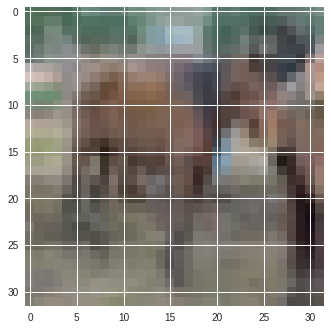

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(X_train[0])

In [8]:
print(X_train.shape)

(54000, 32, 32, 3)


In [29]:
#CNN model 3x[2x(Conv2D+relu)+pooling], flatten, fully connected layer

#CNN model 3x[2x(Conv2D+relu)+pooling], flatten, fully connected layer

weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3), padding= "Same",activation = "relu",kernel_regularizer=regularizers.l2(weight_decay), input_shape = (32,32,3)))
model.add(Conv2D(32, kernel_size = (3,3), padding= "Same",kernel_regularizer=regularizers.l2(weight_decay),activation = "relu"))
model.add(MaxPooling2D(pool_size =(2,2),strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,kernel_size = (3,3), padding= "Same",kernel_regularizer=regularizers.l2(weight_decay),activation = "relu"))
model.add(Conv2D(64,kernel_size = (3,3), padding= "Same",kernel_regularizer=regularizers.l2(weight_decay),activation = "relu"))
model.add(MaxPooling2D(pool_size =(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128,kernel_size = (3,3), padding= "Same",kernel_regularizer=regularizers.l2(weight_decay),activation = "relu"))
model.add(Conv2D(128,kernel_size = (3,3), padding= "Same",kernel_regularizer=regularizers.l2(weight_decay),activation = "relu"))
model.add(MaxPooling2D(pool_size =(2,2), strides=(2,2)))
model.add(Dropout(0.4))


model.add(Flatten())
model.add(Dense(10,activation = "softmax"))

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 64)          0         
__________

In [0]:
from keras.optimizers import RMSprop
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-06, decay=1e-6)
model.compile(optimizer =optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [0]:
#data_augmentation

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [0]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [25]:
print(X_train.shape)

(54000, 32, 32, 3)


In [36]:
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size = 64), epochs = 100,validation_data=(X_val, y_val),verbose = 2,callbacks=[learning_rate_reduction])
                                         

Epoch 1/100
 - 41s - loss: 0.5661 - acc: 0.8302 - val_loss: 0.5574 - val_acc: 0.8443
Epoch 2/100
 - 41s - loss: 0.5672 - acc: 0.8296 - val_loss: 0.5419 - val_acc: 0.8503
Epoch 3/100
 - 41s - loss: 0.5642 - acc: 0.8297 - val_loss: 0.5635 - val_acc: 0.8413
Epoch 4/100
 - 41s - loss: 0.5620 - acc: 0.8322 - val_loss: 0.5504 - val_acc: 0.8460
Epoch 5/100
 - 41s - loss: 0.5626 - acc: 0.8305 - val_loss: 0.5544 - val_acc: 0.8467

Epoch 00005: ReduceLROnPlateau reducing learning rate to 1e-05.
Epoch 6/100
 - 41s - loss: 0.5590 - acc: 0.8323 - val_loss: 0.5514 - val_acc: 0.8473
Epoch 7/100
 - 41s - loss: 0.5602 - acc: 0.8308 - val_loss: 0.5535 - val_acc: 0.8443
Epoch 8/100
 - 41s - loss: 0.5689 - acc: 0.8271 - val_loss: 0.5480 - val_acc: 0.8480
Epoch 9/100
 - 43s - loss: 0.5619 - acc: 0.8326 - val_loss: 0.5480 - val_acc: 0.8450
Epoch 10/100
 - 43s - loss: 0.5599 - acc: 0.8330 - val_loss: 0.5511 - val_acc: 0.8467
Epoch 11/100
 - 43s - loss: 0.5624 - acc: 0.8320 - val_loss: 0.5589 - val_acc: 0.842

In [0]:
model.save_weights

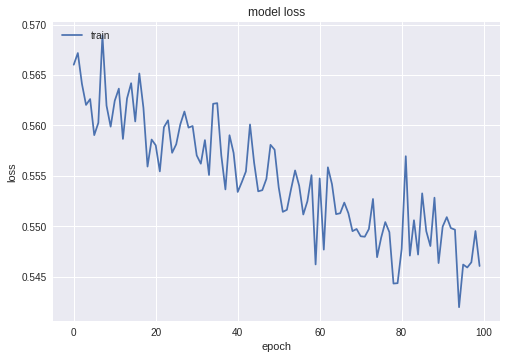

In [40]:
plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [41]:
model.save_weights

<bound method Sequential.save_weights of <keras.models.Sequential object at 0x7f014e6a5b70>>

In [43]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=64)
print(loss_and_metrics)

3000/3000 [==============================] - 0s 162us/step
[0.5416899622281393, 0.8440000004768372]
